In [1]:
import MyTensor as MT
inputtensor=MT.mytensor([[3,4,2],[1,2,3]])

In [2]:
import MyNN as MN 
layer1=MN.my_linear_layer(in_feature=3,out_feature=4)
layer2=MN.my_linear_layer(in_feature=4,out_feature=6)
layer3=MN.my_linear_layer(in_feature=6,out_feature=4)

In [3]:
pred1=layer1(inputtensor)
pred2=layer2(pred1)
pred3=layer3(pred2)

In [4]:
pred3

tensor32([[-45.01278   17.33528  -35.606525  30.772198]
 [-35.325928   7.75865  -27.118923  14.753616]])

In [5]:
label_true=MT.mytensor([[0,1,1,2],[2,1,3,0]])

In [6]:
label_true

tensor32([[0. 1. 1. 2.]
 [2. 1. 3. 0.]])

In [7]:
len(MT.mytensor.computegraph._edgelist)

18

In [8]:
import Loss

In [9]:
L1 = Loss.L1()

In [10]:
L1(pred3,label_true)

107.84195

In [11]:
MT.mytensor.computegraph._lossnodes_index

[28]

In [12]:
len(MT.mytensor.computegraph._edgelist)

25

In [13]:
cg=MT.mytensor.computegraph

In [14]:
import networkx as nx

In [15]:
simple_DiG=nx.DiGraph()

In [16]:
cg._edgelist

[{'from': 0, 'to': 2, 'forward': {'op': 'dot', 'with': 1, 'pos': 'right'}},
 {'from': 1, 'to': 2, 'forward': {'op': 'dot', 'with': 0}, 'pos': 'left'},
 {'from': 3, 'to': 5, 'forward': {'op': 'dot', 'with': 4, 'pos': 'right'}},
 {'from': 4, 'to': 5, 'forward': {'op': 'dot', 'with': 3}, 'pos': 'left'},
 {'from': 2, 'to': 6, 'forward': {'op': 'add', 'with': 5, 'pos': 'right'}},
 {'from': 5, 'to': 6, 'forward': {'op': 'add', 'with': 2}, 'pos': 'left'},
 {'from': 6, 'to': 8, 'forward': {'op': 'dot', 'with': 7, 'pos': 'right'}},
 {'from': 7, 'to': 8, 'forward': {'op': 'dot', 'with': 6}, 'pos': 'left'},
 {'from': 9, 'to': 11, 'forward': {'op': 'dot', 'with': 10, 'pos': 'right'}},
 {'from': 10, 'to': 11, 'forward': {'op': 'dot', 'with': 9}, 'pos': 'left'},
 {'from': 8, 'to': 12, 'forward': {'op': 'add', 'with': 11, 'pos': 'right'}},
 {'from': 11, 'to': 12, 'forward': {'op': 'add', 'with': 8}, 'pos': 'left'},
 {'from': 12, 'to': 14, 'forward': {'op': 'dot', 'with': 13, 'pos': 'right'}},
 {'from

In [17]:
cg.__backtrace_guidegraph__()

In [18]:
potential_edges = []
for i in cg._edgelist:
    if i['to']==28:
        potential_edges.append(i)

In [19]:
len(cg._valid_path_reversed)

12

In [20]:
cg._path_filter()

In [22]:
len(cg._valid_path_reversed)

10

In [24]:
for i in cg._edgelist:
    simple_DiG.add_edge(i['from'],i['to'])

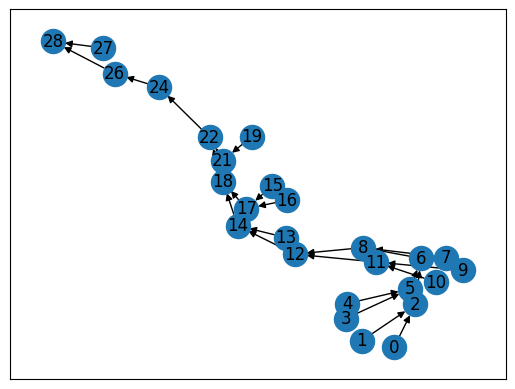

In [25]:
nx.draw_networkx(simple_DiG,pos=nx.spring_layout(simple_DiG))

In [26]:
len(cg._parameternodes_index)

6

In [27]:
len(cg._edgelist)

25

In [28]:
len(cg._parameteredges_index)

12

In [36]:
cg._valid_path_reversed[-1]['path']

[{'from': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
   [40.097336  49.18397    3.7637796 40.774857 ]]),
  'to': tensor32([[152.1741 ]
   [133.81995]]),
  'forward': {'op': 'dot',
   'with': tensor32([[1.]
    [1.]
    [1.]
    [1.]]),
   'pos': 'right'},
  'grad': tensor32([[1. 1. 1. 1.]])},
 {'from': tensor32([[1.]
   [1.]
   [1.]
   [1.]]),
  'to': tensor32([[152.1741 ]
   [133.81995]]),
  'forward': {'op': 'dot',
   'with': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
    [40.097336  49.18397    3.7637796 40.774857 ]])},
  'pos': 'left',
  'grad': tensor32([[43.864197  40.097336 ]
   [56.40194   49.18397  ]
   [ 3.6946754  3.7637796]
   [48.213287  40.774857 ]])},
 {'from': tensor32([[1924.0677   3181.1787     13.650626 2324.521   ]
   [1607.7964   2419.063      14.166038 1662.5889  ]]),
  'to': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
   [40.097336  49.18397    3.7637796 40.774857 ]]),
  'forward': {'op': 'mytensor.__pow__', 'with': 0.5},
  '

In [37]:
cg._valid_path_reversed[-2]['path']==cg._valid_path_reversed[0]['path']

True

In [29]:
cg._flow_reversed

[]

In [34]:
cg._valid_path_reversed

[{'loss': 28,
  'pointer': 27,
  'path': [{'from': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
     [40.097336  49.18397    3.7637796 40.774857 ]]),
    'to': tensor32([[152.1741 ]
     [133.81995]]),
    'forward': {'op': 'dot',
     'with': tensor32([[1.]
      [1.]
      [1.]
      [1.]]),
     'pos': 'right'},
    'grad': tensor32([[1. 1. 1. 1.]])},
   {'from': tensor32([[1.]
     [1.]
     [1.]
     [1.]]),
    'to': tensor32([[152.1741 ]
     [133.81995]]),
    'forward': {'op': 'dot',
     'with': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
      [40.097336  49.18397    3.7637796 40.774857 ]])},
    'pos': 'left',
    'grad': tensor32([[43.864197  40.097336 ]
     [56.40194   49.18397  ]
     [ 3.6946754  3.7637796]
     [48.213287  40.774857 ]])},
   {'from': tensor32([[1924.0677   3181.1787     13.650626 2324.521   ]
     [1607.7964   2419.063      14.166038 1662.5889  ]]),
    'to': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
     [40.09733

In [42]:
import torch

In [49]:
MT.mytensor.computegraph.__dict__

{'_nodelist': [tensor32([[3. 4. 2.]
   [1. 2. 3.]]),
  myparameter([[-0.7896763  -0.38064478  0.29744059  0.49221405]
   [ 0.59949791 -0.96392597  0.34778695 -0.51785053]
   [-0.37569417 -1.01026983  0.91600314  0.78904087]], tensor32),
  tensor32([[-0.7224256 -7.018178   4.1154757  0.9833218]
   [-0.717763  -5.3393064  3.741024   1.8236356]]),
  tensor32([[1.]
   [1.]]),
  myparameter([[-2.18750058  0.36007312 -1.7711485   1.2654616 ]], tensor32),
  tensor32([[-2.1875005   0.36007312 -1.7711484   1.2654616 ]
   [-2.1875005   0.36007312 -1.7711484   1.2654616 ]]),
  tensor32([[-2.909926  -6.658105   2.3443272  2.2487833]
   [-2.9052634 -4.9792333  1.9698756  3.089097 ]]),
  myparameter([[ 0.47537992  2.86292214  0.33876554 -0.71922877  2.2485518   2.83138896]
   [ 0.4475574  -0.02464044 -1.19758158 -1.66476543  1.20912294  0.59082431]
   [-0.48661469 -0.17164699  0.37395972  0.8439574  -0.31151595 -0.97145338]
   [-0.73269735 -0.226185   -0.89764802 -0.10888761 -1.20692493 -0.00748609]

In [35]:
import numpy as np

array([[-1.75642188e+00, -2.69136440e-05, -1.06604683e+00,
        -3.86076890e-01],
       [-9.67319923e-01,  1.28977872e+00, -5.93348696e-01,
         1.79582046e+00],
       [ 1.85981494e-01,  8.83868846e-01,  7.20115020e-01,
        -4.36366714e-01]])

In [36]:
x=MT.mytensor(np.array([[1,2,3],[2,3,2],[2,1,3]]))

In [42]:
x=MT.dot(x,x)

In [43]:
x=MT.add(x,x)